In [1]:
# CELL 1: Import libraries and load dataset
# Purpose: Load the dataset and check its basic structure

import pandas as pd
import numpy as np

df = pd.read_csv("paddydataset.csv")   # adjust path if needed

print("Dataset shape:", df.shape)
df.head()


Dataset shape: (2789, 45)


,Hectares,Agriblock,Variety,Soil Types,Seedrate(in Kg),LP_Mainfield(in Tonnes),Nursery,Nursery area (Cents),LP_nurseryarea(in Tonnes),DAP_20days,...,Wind Direction_D1_D30,Wind Direction_D31_D60,Wind Direction_D61_D90,Wind Direction_D91_D120,Relative Humidity_D1_D30,Relative Humidity_D31_D60,Relative Humidity_D61_D90,Relative Humidity_D91_D120,Trash(in bundles),Paddy yield(in Kg)
0,6,Cuddalore,CO_43,alluvial,150,75.0,dry,120,6,240,...,SW,W,NNW,WSW,72.0,78,88,85,540,35028
1,6,Kurinjipadi,ponmani,clay,150,75.0,wet,120,6,240,...,NW,S,SE,SSE,64.6,85,84,87,600,35412
2,6,Panruti,delux ponni,alluvial,150,75.0,dry,120,6,240,...,ENE,NE,NNE,W,85.0,96,84,79,600,36300
3,6,Kallakurichi,CO_43,clay,150,75.0,wet,120,6,240,...,W,WNW,SE,S,88.5,95,81,84,540,35016
4,6,Sankarapuram,ponmani,alluvial,150,75.0,dry,120,6,240,...,SSE,W,SW,NW,72.7,91,83,81,600,34044


In [2]:
# CELL 2: Clean column names
# Purpose: Remove extra spaces and standardize column names

df.columns = df.columns.str.strip()          # remove leading/trailing spaces
df.columns = df.columns.str.replace(" ", "_")  # replace spaces with underscore

print("Cleaned column names:")
df.columns


Cleaned column names:


Index(['Hectares', 'Agriblock', 'Variety', 'Soil_Types', 'Seedrate(in_Kg)',
       'LP_Mainfield(in_Tonnes)', 'Nursery', 'Nursery_area_(Cents)',
       'LP_nurseryarea(in_Tonnes)', 'DAP_20days', 'Weed28D_thiobencarb',
       'Urea_40Days', 'Potassh_50Days', 'Micronutrients_70Days',
       'Pest_60Day(in_ml)', '30DRain(_in_mm)', '30DAI(in_mm)',
       '30_50DRain(_in_mm)', '30_50DAI(in_mm)', '51_70DRain(in_mm)',
       '51_70AI(in_mm)', '71_105DRain(in_mm)', '71_105DAI(in_mm)',
       'Min_temp_D1_D30', 'Max_temp_D1_D30', 'Min_temp_D31_D60',
       'Max_temp_D31_D60', 'Min_temp_D61_D90', 'Max_temp_D61_D90',
       'Min_temp_D91_D120', 'Max_temp_D91_D120',
       'Inst_Wind_Speed_D1_D30(in_Knots)', 'Inst_Wind_Speed_D31_D60(in_Knots)',
       'Inst_Wind_Speed_D61_D90(in_Knots)',
       'Inst_Wind_Speed_D91_D120(in_Knots)', 'Wind_Direction_D1_D30',
       'Wind_Direction_D31_D60', 'Wind_Direction_D61_D90',
       'Wind_Direction_D91_D120', 'Relative_Humidity_D1_D30',
       'Relative_Humid

In [3]:
# CELL 3: Check and remove duplicate rows
# Purpose: Identify and remove duplicate records

duplicate_count = df.duplicated().sum()
print("Number of duplicate rows:", duplicate_count)

df = df.drop_duplicates()

print("Shape after removing duplicates:", df.shape)


Number of duplicate rows: 451
Shape after removing duplicates: (2338, 45)


In [4]:
# CELL 4: Check missing values
# Purpose: Identify missing values in each column

missing_values = df.isnull().sum()
missing_values[missing_values > 0]


,0


In [5]:
# Handle missing values

# Separate numerical and categorical columns
num_cols = df.select_dtypes(include=["int64", "float64"]).columns
cat_cols = df.select_dtypes(include=["object"]).columns

# Fill numerical columns with median
for col in num_cols:
    df[col] = df[col].fillna(df[col].median())

# Fill categorical columns with mode
for col in cat_cols:
    df[col] = df[col].fillna(df[col].mode()[0])

print("Total missing values after treatment:", df.isnull().sum().sum())


Total missing values after treatment: 0


In [6]:
# CELL 6: Encode categorical variables
# Purpose: Convert categorical features into numerical form

from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

for col in cat_cols:
    df[col] = le.fit_transform(df[col])

print("Categorical columns encoded successfully.")


Categorical columns encoded successfully.


In [7]:
# CELL 7: Final check after preprocessing
# Purpose: Ensure dataset is clean and ready for EDA

print("Final dataset shape:", df.shape)
df.head()


Final dataset shape: (2338, 45)


,Hectares,Agriblock,Variety,Soil_Types,Seedrate(in_Kg),LP_Mainfield(in_Tonnes),Nursery,Nursery_area_(Cents),LP_nurseryarea(in_Tonnes),DAP_20days,...,Wind_Direction_D1_D30,Wind_Direction_D31_D60,Wind_Direction_D61_D90,Wind_Direction_D91_D120,Relative_Humidity_D1_D30,Relative_Humidity_D31_D60,Relative_Humidity_D61_D90,Relative_Humidity_D91_D120,Trash(in_bundles),Paddy_yield(in_Kg)
0,6,1,0,0,150,75.0,0,120,6,240,...,4,3,2,5,72.0,78,88,85,540,35028
1,6,3,2,1,150,75.0,1,120,6,240,...,2,2,3,3,64.6,85,84,87,600,35412
2,6,4,1,0,150,75.0,0,120,6,240,...,1,1,1,4,85.0,96,84,79,600,36300
3,6,2,0,1,150,75.0,1,120,6,240,...,5,4,3,2,88.5,95,81,84,540,35016
4,6,5,2,0,150,75.0,0,120,6,240,...,3,3,4,1,72.7,91,83,81,600,34044


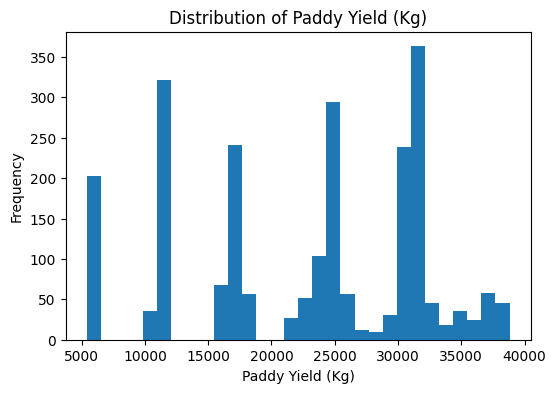

In [8]:
# CELL 1: Distribution of Paddy Yield
# Purpose: Understand how yield values are distributed

import matplotlib.pyplot as plt

plt.figure(figsize=(6,4))
plt.hist(df["Paddy_yield(in_Kg)"], bins=30)
plt.title("Distribution of Paddy Yield (Kg)")
plt.xlabel("Paddy Yield (Kg)")
plt.ylabel("Frequency")
plt.show()


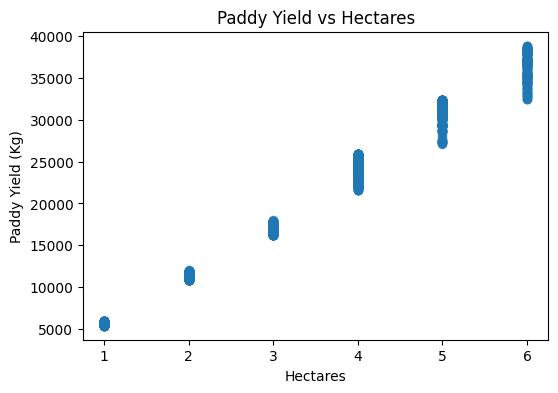

In [9]:
# CELL 2: Yield vs Land Area
# Purpose: Relationship between cultivated area and yield

plt.figure(figsize=(6,4))
plt.scatter(df["Hectares"], df["Paddy_yield(in_Kg)"], alpha=0.6)
plt.title("Paddy Yield vs Hectares")
plt.xlabel("Hectares")
plt.ylabel("Paddy Yield (Kg)")
plt.show()


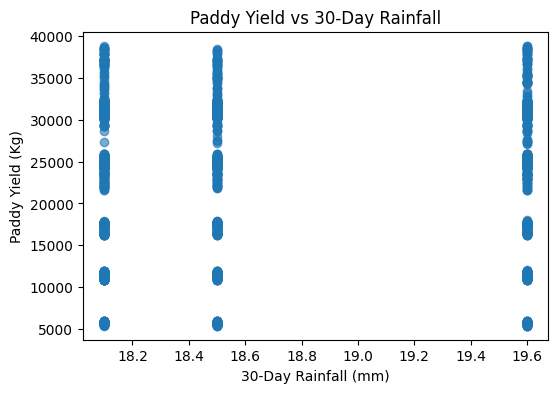

In [10]:
# CELL 3: Yield vs Rainfall (Early Stage)

plt.figure(figsize=(6,4))
plt.scatter(df["30DRain(_in_mm)"], df["Paddy_yield(in_Kg)"], alpha=0.6)
plt.title("Paddy Yield vs 30-Day Rainfall")
plt.xlabel("30-Day Rainfall (mm)")
plt.ylabel("Paddy Yield (Kg)")
plt.show()




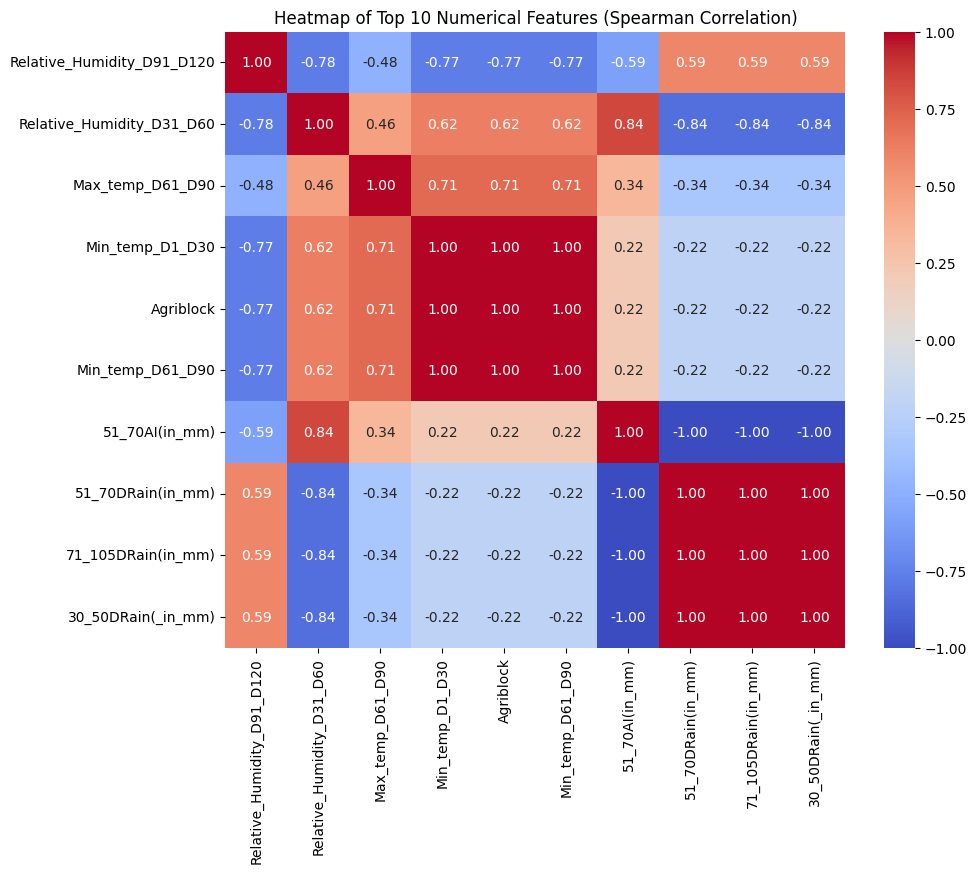

In [11]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# select only numeric columns
num_df = df.select_dtypes(include=[np.number])

# compute spearman correlation
corr = num_df.corr(method="spearman")

# select top 10 columns most correlated with each other (high variance in correlation)
top10_cols = (
    corr.abs()
        .mean()
        .sort_values(ascending=False)
        .head(10)
        .index
)

# subset correlation matrix
top10_corr = corr.loc[top10_cols, top10_cols]

# plot heatmap
plt.figure(figsize=(10,8))
sns.heatmap(top10_corr, annot=True, fmt=".2f", cmap="coolwarm", center=0)
plt.title("Heatmap of Top 10 Numerical Features (Spearman Correlation)")
plt.show()
